<a href="https://colab.research.google.com/github/strumer69/Car_price_prediction/blob/main/1_car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [4]:
from google.colab import files
uploaded=files.upload()

Saving car1.csv to car1.csv


In [24]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['car1.csv']))

# first look at the data


In [6]:

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.tail()       # Last 5 rows


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [87]:
df.sample(5)    # Random 5 rows


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
246,i20,2012,3.75,6.79,35000,Petrol,Dealer,Manual,0
19,sx4,2010,2.65,7.98,41442,Petrol,Dealer,Manual,0
164,Hero Splender iSmart,2016,0.45,0.54,14000,Petrol,Individual,Manual,0
22,sx4,2011,4.40,8.01,50000,Petrol,Dealer,Automatic,0
241,xcent,2015,4.75,7.13,35866,Petrol,Dealer,Manual,1


In [88]:
df.shape        # (Rows, Columns)


(301, 9)

In [89]:
df.columns      # Column names


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [90]:
df.info()       # Data types + Non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# 1. Basic Data Inspection

# *Check* for Missing Data


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df.isnull().sum()               # Count of missing values per column


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [93]:
df.isnull().mean() * 100        # Percentage of missing values


,0
Car_Name,0.0
Year,0.0
Selling_Price,0.0
Present_Price,0.0
Kms_Driven,0.0
Fuel_Type,0.0
Seller_Type,0.0
Transmission,0.0
Owner,0.0


<Axes: >

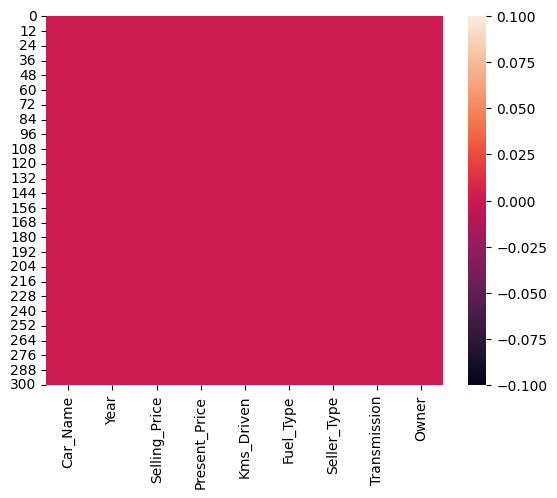

In [94]:
sns.heatmap(df.isnull())        # Visualize missing data (heatmap)


# 2. Statistical Summary


In [95]:
df.describe()   # Basic stats (mean, std, min, max, percentiles)


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# categorical column
df.describe(include='object')  # Count, unique, top, frequency


,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [16]:
# Check Unique Values in Categorical Columns

for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())
    print("----------------------")

Car_Name: 98 unique values
Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64
----------------------
Fuel_Type: 3 unique values
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
----------------------
Seller_Type: 2 unique values
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
----------------------
Transmission: 2 unique values
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
----------------------


# 3. Data Visualization


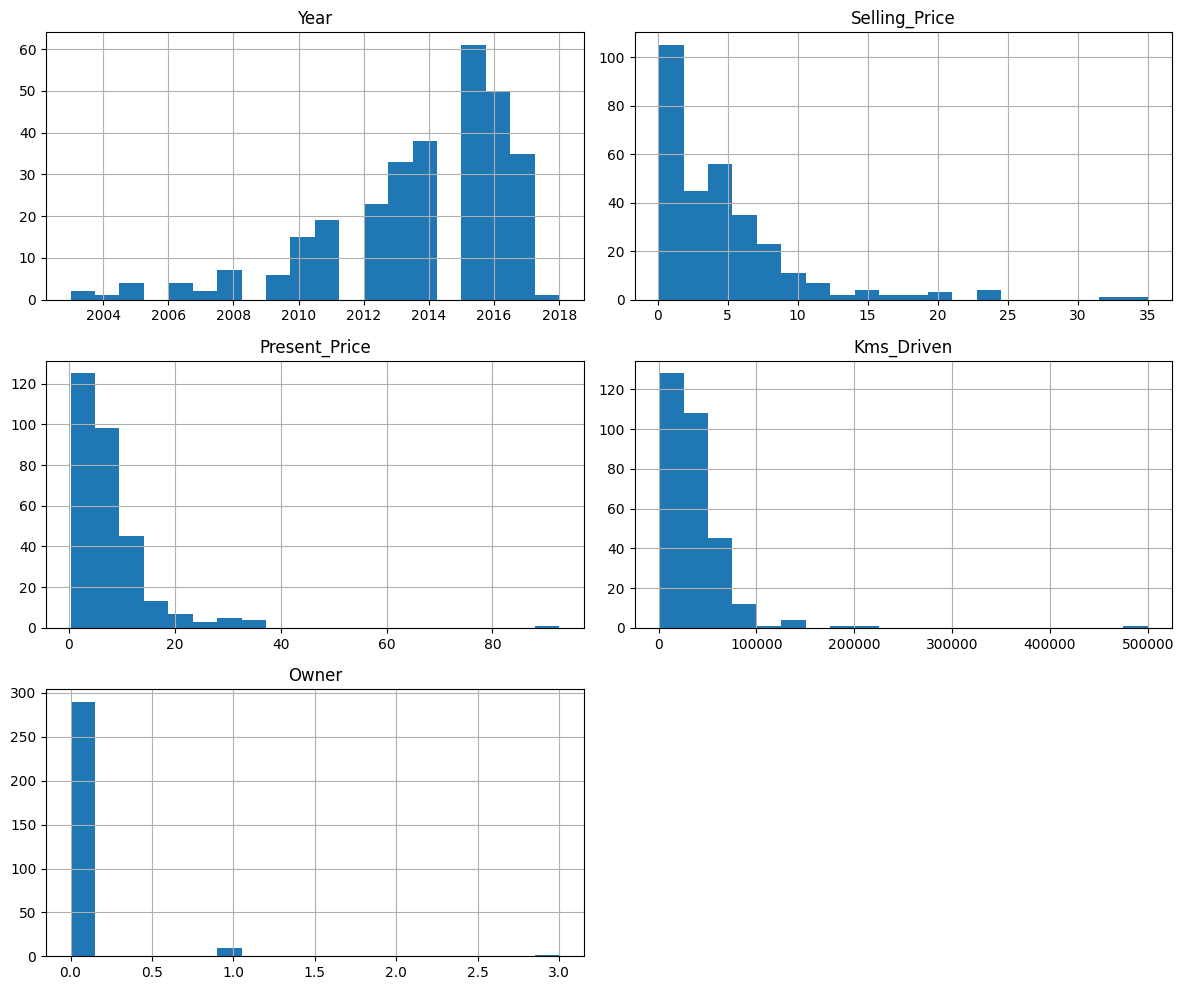

In [98]:
# Histograms (Numerical Data Distribution)
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()


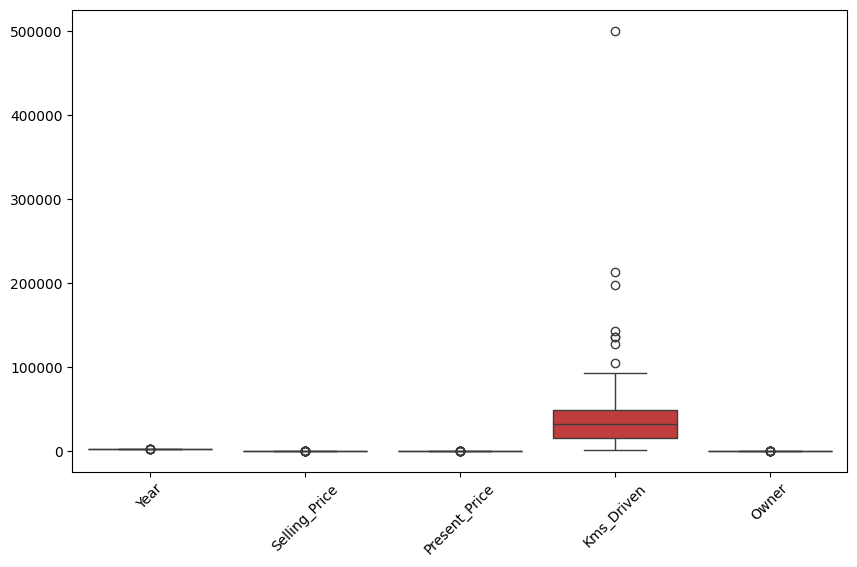

In [14]:
# Boxplots (Check for Outliers)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.show()

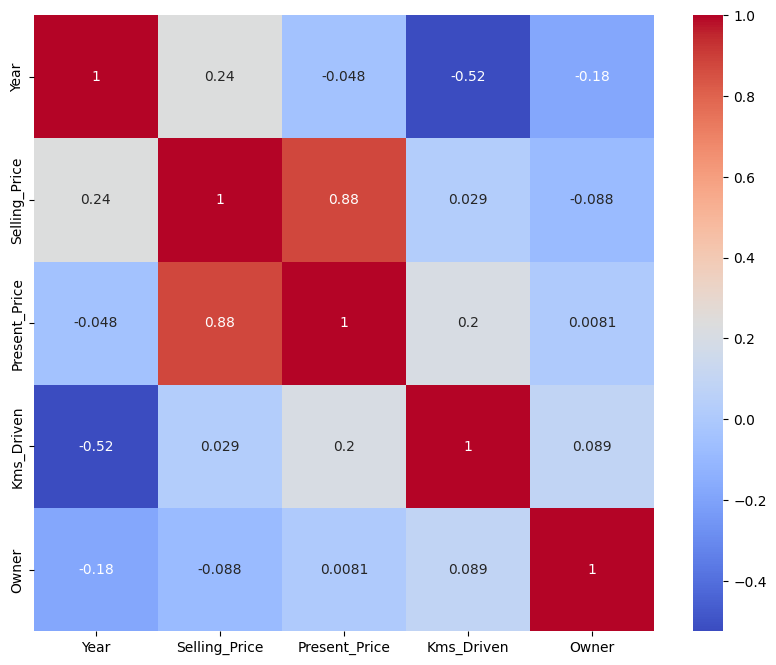

In [100]:
# Correlation Heatmap (Relationships Between Numerical Variables) - before normalization
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

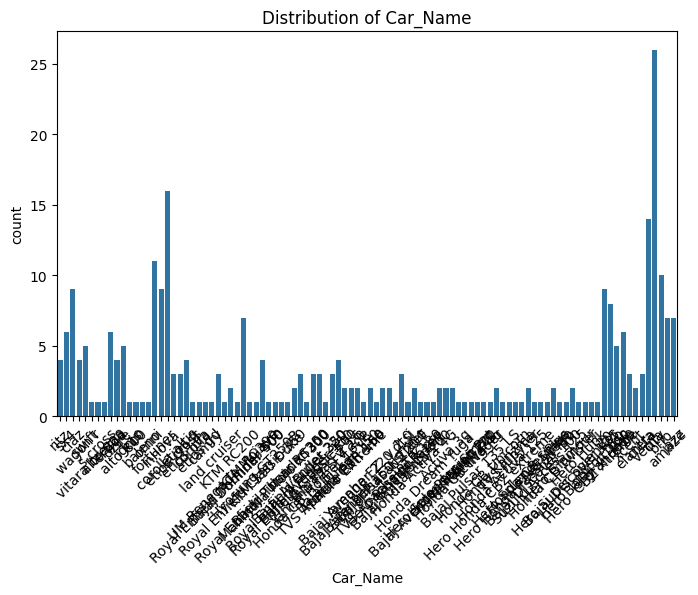

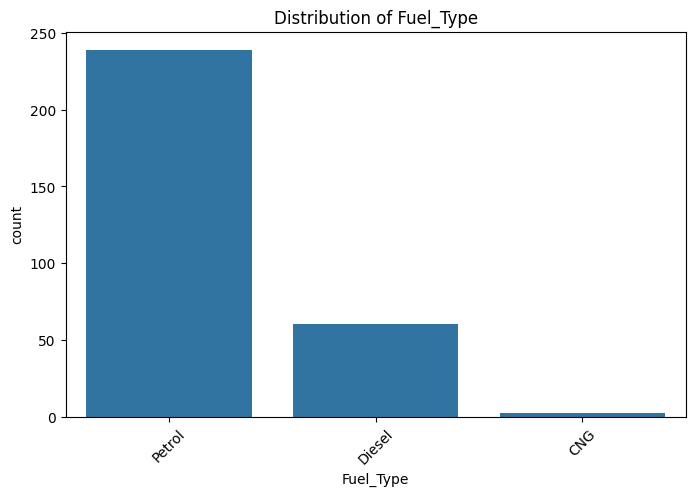

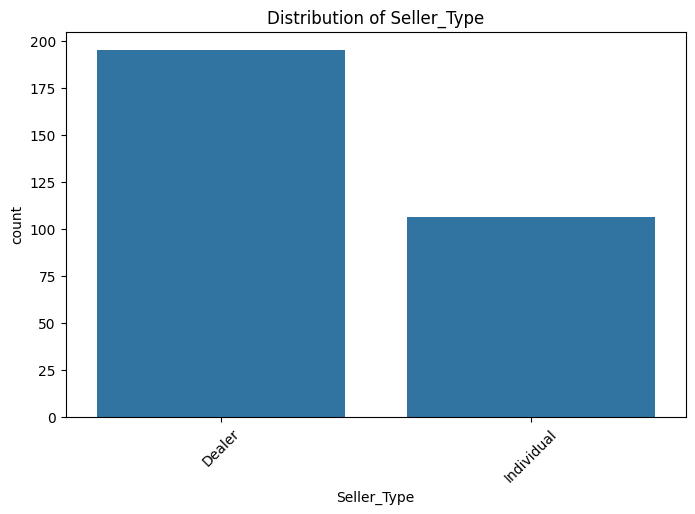

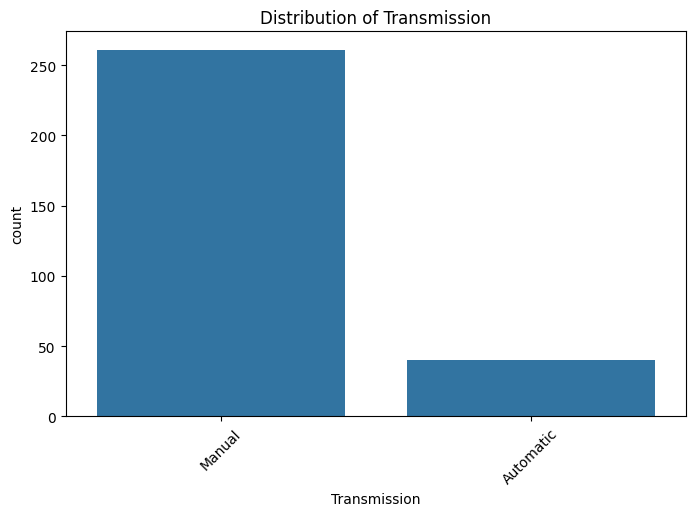

In [101]:
# Count Plots (Categorical Data Distribution)

for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

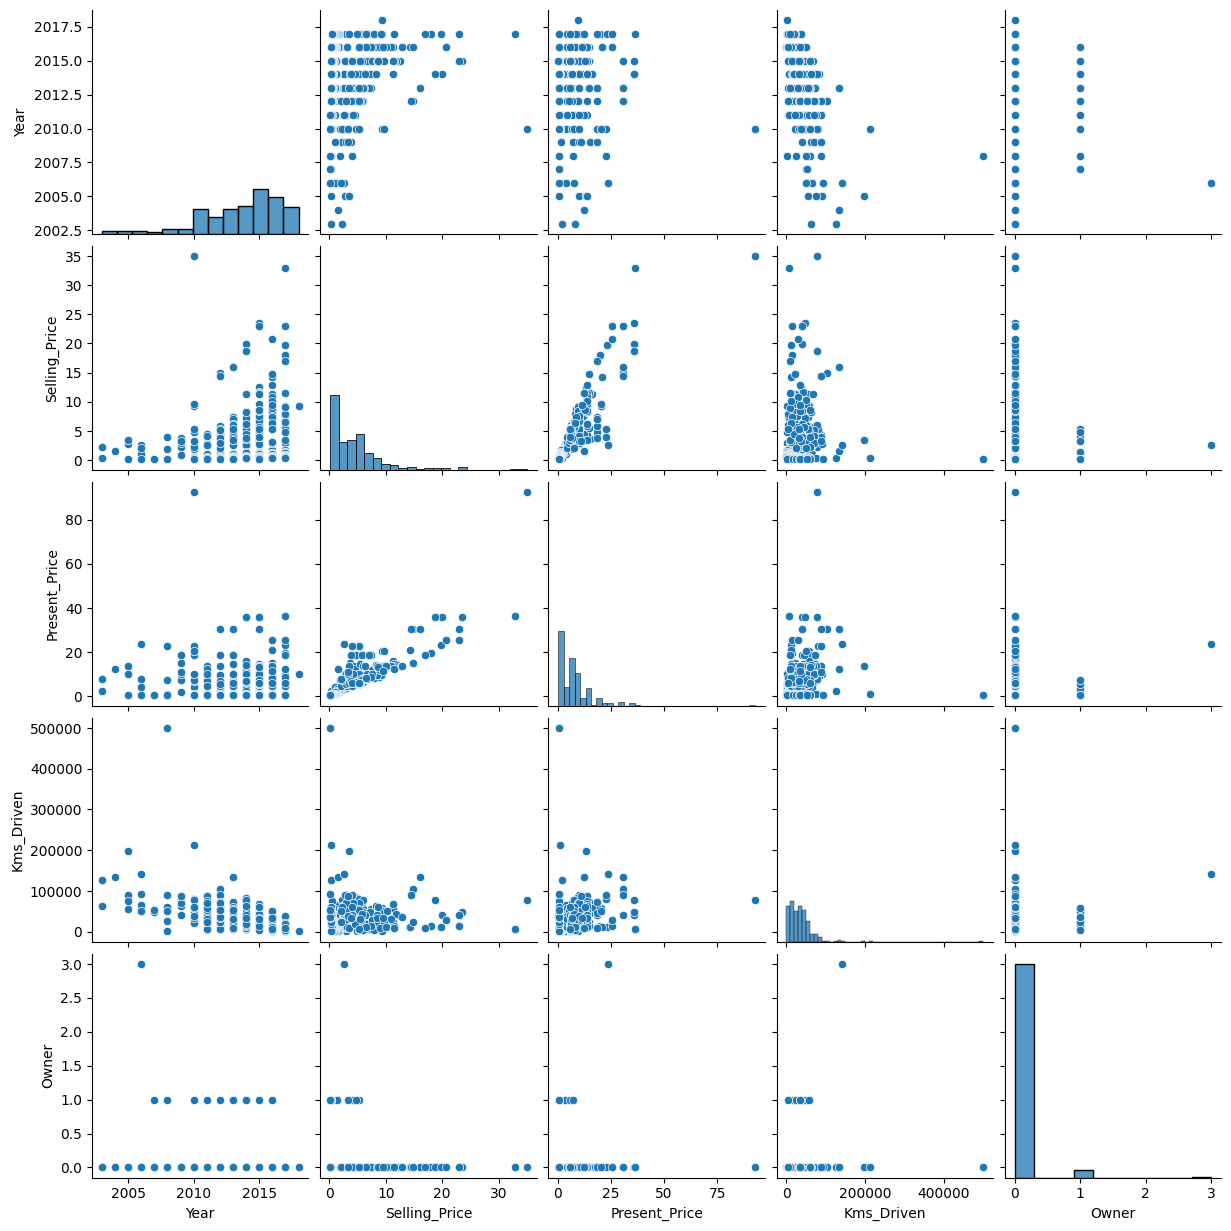

In [102]:
# Scatter Plots (Relationships Between Numerical Variables)

sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.show()

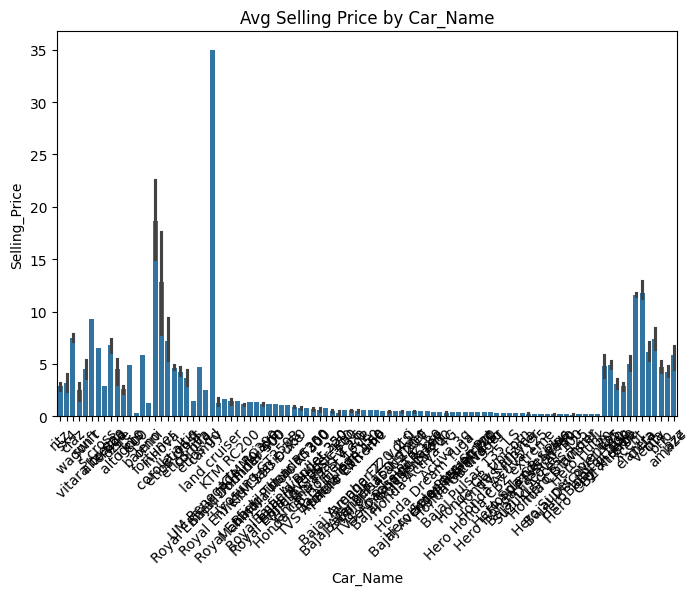

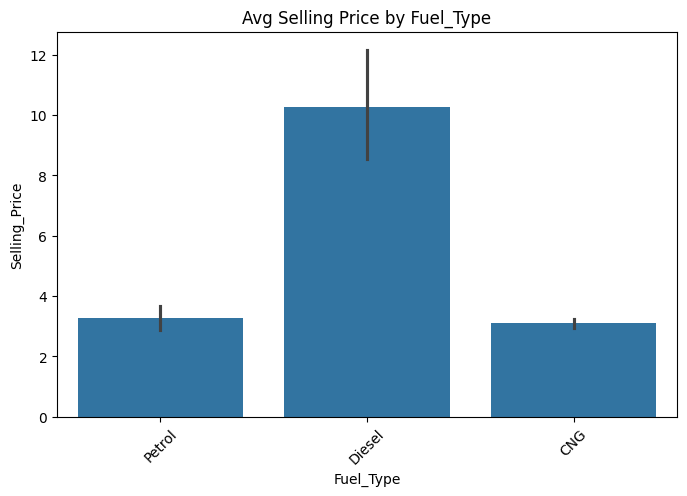

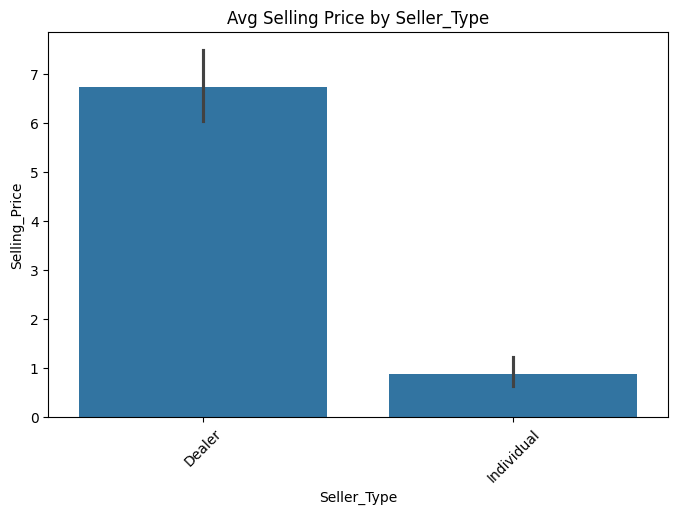

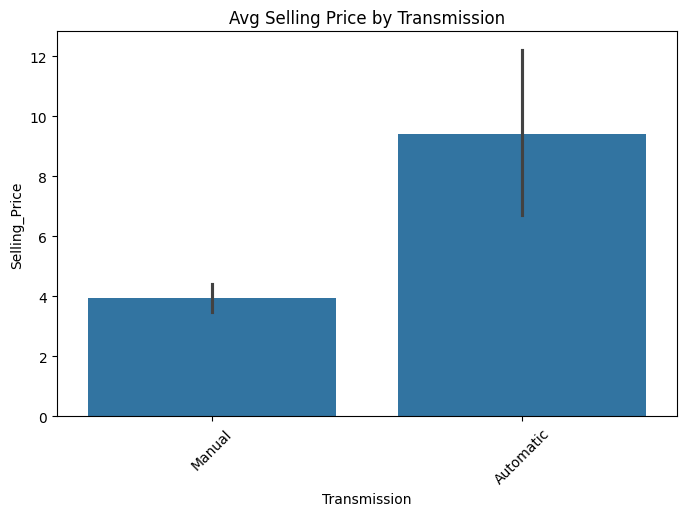

In [103]:
# Bar Plot (Mean of Numerical Feature per Category)
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x=col, y='Selling_Price')
    plt.xticks(rotation=45)
    plt.title(f"Avg Selling Price by {col}")
    plt.show()

# 4. Advanced Analysis


In [104]:
# Check Skewness (Data Distribution)
# data is the data after converting categorical to numerical
data.skew()  # Positive/negative skew indicates data imbalance

,0
Car_Name,-0.832386
Year,-1.246189
Selling_Price,2.493422
Present_Price,4.083150
Kms_Driven,6.436013
Fuel_Type,-1.669601
Seller_Type,0.622146
Transmission,-2.173776
Owner,7.616850


In [105]:
# check for duplicate
df.duplicated().sum()  # Number of duplicate rows
df.drop_duplicates(inplace=True)  # Remove duplicates

In [106]:
# GroupBy Analysis (Aggregations)

df.groupby('Fuel_Type')['Selling_Price'].mean()  # Avg price by fuel type
df.groupby('Transmission')['Selling_Price'].agg(['mean', 'median', 'count'])  # Multiple stats

,mean,median,count
Transmission,,,
Automatic,9.071795,5.75,39
Manual,3.917308,3.25,260


In [107]:
#Pivot Tables

pd.pivot_table(df, index='Fuel_Type', columns='Transmission', values='Selling_Price', aggfunc='mean')

Transmission,Automatic,Manual
Fuel_Type,,
CNG,NaN,3.100000
Diesel,20.490000,7.671702
Petrol,4.586071,3.088768


# 5. Exporting Processed Data (Optional)


In [9]:
df.to_csv('cleaned_car_data.csv', index=False)  # Save cleaned data

# 6- training

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


![image.png]()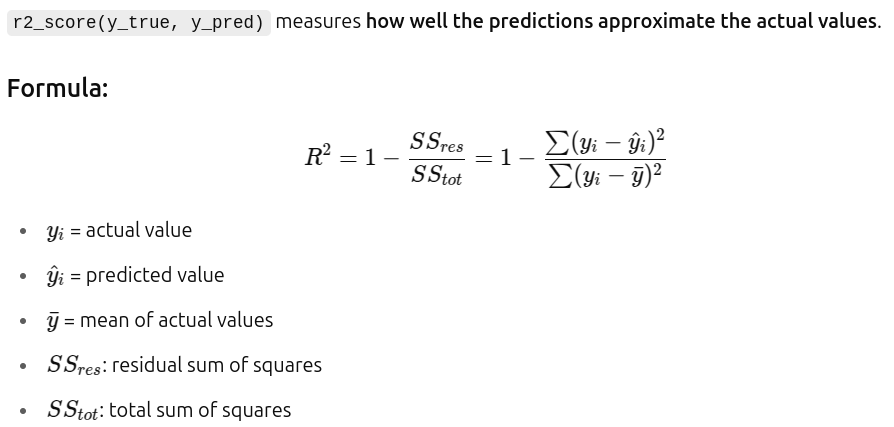

In [11]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder



In [25]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
# Data preprocessing
# Convert categorical variables to numerical
data=df.copy()
label_encoders = {}
categorical_cols = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [27]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [28]:
# Select features and target variable(name is not important)
features = ['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
X = data[features]
y = data['Selling_Price']

In [29]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 3.53
R-squared Score: 0.85


In [31]:
# Example prediction
example_car = pd.DataFrame({
    'Year': [2018],
    'Present_Price': [10.0],
    'Kms_Driven': [25000],
    'Fuel_Type': [label_encoders['Fuel_Type'].transform(['Petrol'])[0]],
    'Seller_Type': [label_encoders['Seller_Type'].transform(['Dealer'])[0]],
    'Transmission': [label_encoders['Transmission'].transform(['Manual'])[0]],
    'Owner': [0]
})
example_car


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2018,10.0,25000,2,0,1,0


In [32]:

predicted_price = model.predict(example_car)
print(f"\nPredicted Selling Price for example car: ${predicted_price[0]:.2f}")


Predicted Selling Price for example car: $7.37
